<a href="https://colab.research.google.com/github/djglab/Foxk1_manuscript/blob/main/Figure_3cdef_RNA_ATAC_Integration_chromVAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to integrate the RNA and ATAC data to see TFs highlighted from chromVar.

In [ ]:
start_time0 <- Sys.time()

#**Install external packages**

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

#**Downloading and loading packages required for the analysis**

In [ ]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'chromVAR', 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'gplots', 'circlize', 'plyr', 'dplyr',  'ggrepel', 'splitstackshape',  'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'apeglm', 'biomaRt', 'org.Mm.eg.db', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'clusterProfiler', 'ggplot2',
  'GO.db','ReactomePA', 'ggnewscale', 'pathview', 'gage', 'gageData'
))
devtools::install_github("GreenleafLab/chromVARmotifs")
devtools::install_github("jokergoo/ComplexHeatmap")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr' 'ggplot2'”
Installing package(s) 'BiocVersion', 'chromVAR',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'gplots', 'circlize', 'plyr',
  'ggrepel', 'splitstackshape', 'BiocParallel', 'SummarizedExperiment',
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'apeglm', '

fansi (1.0.2 -> 1.0.3) [CRAN]


Installing 1 packages: fansi

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpW3e3Wj/remotes3d7226febc/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




iterators  (NA -> 1.0.14) [CRAN]
foreach    (NA -> 1.5.2 ) [CRAN]
doParallel (NA -> 1.0.17) [CRAN]
clue       (NA -> 0.3-60) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 5 packages: iterators, foreach, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpW3e3Wj/remotes3d514d6d68/jokergoo-ComplexHeatmap-22ab8e0/DESCRIPTION’ ... OK
* preparing ‘ComplexHeatmap’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ComplexHeatmap_2.11.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]


Installing 2 packages: TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpW3e3Wj/remotes3d7053c468/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpW3e3Wj/remotes3d293e0756/YuLab-SMU-ChIPseeker-5371322/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(GenomicRanges)
library(ggrepel)
library(splitstackshape)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(DESeq2)
library(VennDiagram)
library(ggwordcloud)
library(apeglm)
library(biomaRt)
library(org.Mm.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(ggplot2)
library(tidyr)
library(Matrix)
library(GO.db)
library(matrixStats)
library(ComplexHeatmap)
library(stringr)
library(DOSE)
library(ReactomePA)
library(ggnewscale)
library(GOSemSim)
library(enrichplot)
library(pathview)
library(gage)
library(gageData)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)



Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: Biostrings

Loadin

#**Generate a Granges dataset 'gr' using the bed files for chromVar analysis**

In [ ]:
s3_bed_files <- c(
  'FoxK1_KO_D3-1_S1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-1_S1.dedup_summits.bed',
  'FoxK1_KO_D3-2_S2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-2_S2.dedup_summits.bed',
  'FoxK1_KO_D5-1_S3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D5-1_S3.dedup_summits.bed',
  'FoxK1_KO_D5-2_S4' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D5-2_S4.dedup_summits.bed',
  'FoxK1_KO_D7-1_S5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-1_S5.dedup_summits.bed',
  'FoxK1_KO_D7-2_S6' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-2_S6.dedup_summits.bed',
  'iFoxk1_Dox_D3-1_S13' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D3-1_S13.dedup_summits.bed',
  'iFoxk1_Dox_D3-2_S14' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D3-2_S14.dedup_summits.bed',
  'iFoxk1_Dox_D5-1_S15' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D5-1_S15.dedup_summits.bed',
  'iFoxk1_Dox_D5-2_S16' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D5-2_S16.dedup_summits.bed',
  'iFoxk1_Dox_D7-1_S17' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D7-1_S17.dedup_summits.bed',
  'iFoxk1_Dox_D7-2_S18' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D7-2_S18.dedup_summits.bed',
  'iFoxk1_ND_D3-1_S7' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-1_S7.dedup_summits.bed',
  'iFoxk1_ND_D3-2_S8' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-2_S8.dedup_summits.bed',
  'iFoxk1_ND_D5-1_S9' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-1_S9.dedup_summits.bed',
  'iFoxk1_ND_D5-2_S10' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-2_S10.dedup_summits.bed',
  'iFoxk1_ND_D7-1_S11' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D7-1_S11.dedup_summits.bed',
  'iFoxk1_ND_D7-2_S12' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D7-2_S12.dedup_summits.bed')


In [ ]:
peak_size <- 200L # the ATAC-seq peaks
window_size <- 800L
gr <- lapply(s3_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = peak_size)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 2, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(width = window_size, fix = 'center')
  gr <- gr[!seqnames(gr) %in% c('chrM', 'chrY')]

In [ ]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr

GRanges object with 94713 ranges and 0 metadata columns:
          seqnames              ranges strand
             <Rle>           <IRanges>  <Rle>
      [1]     chr1     3037558-3038357      *
      [2]     chr1     3062526-3063325      *
      [3]     chr1     3191360-3192159      *
      [4]     chr1     3253111-3253910      *
      [5]     chr1     3263498-3264297      *
      ...      ...                 ...    ...
  [94709]     chrX 170843428-170844227      *
  [94710]     chrX 170843538-170844337      *
  [94711]     chrX 170843706-170844505      *
  [94712]     chrX 170861798-170862597      *
  [94713]     chrX 170880730-170881529      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

#**Read pileup files and get read counts for chromVar analysis**

In [ ]:
s3_bw_files <- c('iFoxk1_ND_D3-1_S7' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-1_S7.dedup_treat_pileup.bw',
  'iFoxk1_ND_D3-2_S8' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-2_S8.dedup_treat_pileup.bw',
  'iFoxk1_ND_D5-1_S9' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-1_S9.dedup_treat_pileup.bw',
  'iFoxk1_ND_D5-2_S10' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-2_S10.dedup_treat_pileup.bw',
  'FoxK1_KO_D3-1_S1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-1_S1.dedup_treat_pileup.bw',
  'FoxK1_KO_D3-2_S2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-2_S2.dedup_treat_pileup.bw',
  'FoxK1_KO_D5-1_S5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-1_S5.dedup_treat_pileup.bw',
  'FoxK1_KO_D5-2_S6' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-2_S6.dedup_treat_pileup.bw')

In [ ]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all s3_bw_files exist: %s', all(file.exists(s3_bw_files))))

all s3_bw_files exist: TRUE



In [ ]:
library(rtracklayer)
library(futile.logger)
X <- do.call('cbind', lapply(s3_bw_files, function(bw_file){
  flog.info(sprintf('reading %s', bw_file))
	ga <- rtracklayer::import(bw_file, format = 'BigWig')#, which = reduce(peaks))	
  cvg <- coverage(ga, weight = as.numeric(mcols(ga)$score))
  sum(cvg[gr])
}))
se <- SummarizedExperiment(assays = SimpleList(counts = X), rowRanges = gr, colData = names(s3_bw_files))

INFO [2022-03-26 01:24:06] reading ./dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-1_S7.dedup_treat_pileup.bw
INFO [2022-03-26 01:24:40] reading ./dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-2_S8.dedup_treat_pileup.bw
INFO [2022-03-26 01:25:00] reading ./dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-1_S9.dedup_treat_pileup.bw
INFO [2022-03-26 01:25:05] reading ./dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-2_S10.dedup_treat_pileup.bw
INFO [2022-03-26 01:25:29] reading ./dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-1_S1.dedup_treat_pileup.bw
INFO [2022-03-26 01:25:53] reading ./dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-2_S2.dedup_treat_pileup.bw
INFO [2022-03-26 01:26:19] reading ./dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-1_S5.dedup_treat_pileup.bw
INFO [2022-03-26 01:26:48] reading ./dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-2_S6.dedup_tre

In [ ]:
se <- addGCBias(se, genome = BSgenome.Mmusculus.UCSC.mm10)

In [ ]:
colnames(colData(se)) <- c("Name") ##Changing colData of sample names from 'X' to 'Name'

## **Adding colData information**

In [ ]:
colData(se)$ND <- grepl('ND', names(s3_bw_files))
colData(se)$KO <- grepl('KO', names(s3_bw_files))
colData(se)$Dox<- grepl('Dox', names(s3_bw_files))
colData(se)$D3 <- grepl('D3', names(s3_bw_files))
colData(se)$D5 <- grepl('D5', names(s3_bw_files))
colData(se)$D7 <- grepl('D7', names(s3_bw_files))

In [ ]:
colData(se)$condition <- t(apply(colData(se)[,c("ND","KO")], 1, function(i) names(colData(se)[,c("ND","KO")])[i]))
colData(se)$time <- t(apply(colData(se)[,c("D3","D5","D7")], 1, function(i) names(colData(se)[,c("D3","D5","D7")])[i]))

In [ ]:
colData(se)$Sample <- paste(colData(se)$condition, colData(se)$time, sep='_')

# **ChromVar analysis for WT vs KO**

In [ ]:
motif_ix <- matchMotifs(mouse_pwms_v2, se, genome = BSgenome.Mmusculus.UCSC.mm10)

In [ ]:
dev <- computeDeviations(object = se, annotations = motif_ix)
v <- computeVariability(dev)

In [ ]:
m <- v$p_value_adj < 0.05
cat(sprintf('# of significant motifs: %d(%d)\n', sum(m), length(m)))
Y <- assays(dev)$z
rownames(Y) <- rowData(dev)$name
Y <- Y[m, ]

# of significant motifs: 822(884)


### Named list for each condition and timepoint - ND_D3, KO_D3, ND_D5 and KO_D5

In [ ]:
nd_d3_atac <- (rowMeans(assays(dev)$deviations[, colData(dev)$Name %in% c('iFoxk1_ND_D3-1_S7', 'iFoxk1_ND_D3-2_S8')])) 
ko_d3_atac <- (rowMeans(assays(dev)$deviations[, colData(dev)$Name %in% c('FoxK1_KO_D3-1_S1', 'FoxK1_KO_D3-2_S2')]))
str(nd_d3_atac)
str(ko_d3_atac)

 Named num [1:884] -0.00318 0.00537 -0.01396 0.00652 -0.01856 ...
 - attr(*, "names")= chr [1:884] "ENSMUSG00000021359_LINE1_Tcfap2a_D_N1" "ENSMUSG00000025927_LINE5_Tcfap2b_D" "ENSMUSG00000028640_LINE6_Tcfap2c_D" "ENSMUSG00000042477_LINE7_Tcfap2e_D" ...
 Named num [1:884] -0.02663 -0.02937 -0.03282 -0.01762 0.00619 ...
 - attr(*, "names")= chr [1:884] "ENSMUSG00000021359_LINE1_Tcfap2a_D_N1" "ENSMUSG00000025927_LINE5_Tcfap2b_D" "ENSMUSG00000028640_LINE6_Tcfap2c_D" "ENSMUSG00000042477_LINE7_Tcfap2e_D" ...


In [ ]:
nd_d5_atac <- (rowMeans(assays(dev)$deviations[, colData(dev)$Name %in% c('iFoxk1_ND_D5-1_S9',	'iFoxk1_ND_D5-2_S10')]))
ko_d5_atac <- (rowMeans(assays(dev)$deviations[, colData(dev)$Name %in% c('FoxK1_KO_D5-1_S5',	'FoxK1_KO_D5-2_S6')]))
str(nd_d5_atac)
str(ko_d5_atac)

 Named num [1:884] 0.0536 0.059 0.0705 0.0251 -0.0225 ...
 - attr(*, "names")= chr [1:884] "ENSMUSG00000021359_LINE1_Tcfap2a_D_N1" "ENSMUSG00000025927_LINE5_Tcfap2b_D" "ENSMUSG00000028640_LINE6_Tcfap2c_D" "ENSMUSG00000042477_LINE7_Tcfap2e_D" ...
 Named num [1:884] 0.006974 0.000153 0.014889 0.001244 0.018525 ...
 - attr(*, "names")= chr [1:884] "ENSMUSG00000021359_LINE1_Tcfap2a_D_N1" "ENSMUSG00000025927_LINE5_Tcfap2b_D" "ENSMUSG00000028640_LINE6_Tcfap2c_D" "ENSMUSG00000042477_LINE7_Tcfap2e_D" ...


### Dataframe containing motif information from chromVar obatined using deviations assay data

In [ ]:
chrom_dat <- data.frame(
  gene_name = v$name,
  D3 = nd_d3_atac - ko_d3_atac,
  pvalue_adj = v$p_value_adj,
  D5 = nd_d5_atac - ko_d5_atac
)
head(chrom_dat)  

,gene_name,D3,pvalue_adj,D5
,<chr>,<dbl>,<dbl>,<dbl>
ENSMUSG00000021359_LINE1_Tcfap2a_D_N1,Tcfap2a,0.02345140,4.832176e-114,0.04667485
ENSMUSG00000025927_LINE5_Tcfap2b_D,Tcfap2b,0.03474041,1.652445e-80,0.05887404
ENSMUSG00000028640_LINE6_Tcfap2c_D,Tcfap2c,0.01885897,2.530736e-240,0.05562516
ENSMUSG00000042477_LINE7_Tcfap2e_D,Tcfap2e,0.02413857,1.063439e-20,0.02383163
ENSMUSG00000042596_LINE8_Tcfap2d_I,Tcfap2d,-0.02474960,3.479234e-163,-0.04104922
ENSMUSG00000004661_LINE10_Arid3b_D,Arid3b,-0.01097093,4.626235e-01,-0.01309656


# RNASeq and DESeq2 

## Read counts files from preprocessed data

In [ ]:
txi_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Kallisto_reseq_txi_v1.rds'
txi <- txi_file %>%
  url() %>%
  gzcon() %>%
  readRDS()

In [ ]:
t2g_dat <- read.table('https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/transcripts_to_genes.txt', sep = '\t') ##Dataset containing transcripts informtion

In [ ]:
colnames(t2g_dat) <- c('ensembl_transcript', 'ensembl_gene', 'gene_name')
head(t2g_dat)

,ensembl_transcript,ensembl_gene,gene_name
,<chr>,<chr>,<chr>
1,ENSMUST00000193812.1,ENSMUSG00000102693.1,4933401J01Rik
2,ENSMUST00000082908.1,ENSMUSG00000064842.1,Gm26206
3,ENSMUST00000162897.1,ENSMUSG00000051951.5,Xkr4
4,ENSMUST00000159265.1,ENSMUSG00000051951.5,Xkr4
5,ENSMUST00000070533.4,ENSMUSG00000051951.5,Xkr4
6,ENSMUST00000192857.1,ENSMUSG00000102851.1,Gm18956


# Normalize the read counts by DESeq2

In [ ]:
condition <- gsub('1_|2_|_iHAFoxk1_EB|Foxk1|_EB|_iHAFoxk1_EB', '', colnames(txi$counts)) ##parsing text to get the day and condition to get 'D3_KO' 
sampleTable <- as.data.frame(condition)

In [ ]:
rownames(sampleTable) <- colnames(txi$counts)
head(sampleTable)

,condition
,<chr>
1_D3_Foxk1KO_EB,D3_KO
1_D3_iHAFoxk1_EB_Dox,D3_Dox
1_D3_iHAFoxk1_EB_ND,D3_ND
1_D5_Foxk1KO_EB,D5_KO
1_D5_iHAFoxk1_EB_Dox,D5_Dox
1_D5_iHAFoxk1_EB_ND,D5_ND


In [ ]:
set.seed(9821)
dds <- DESeqDataSetFromTximport(txi, sampleTable, ~condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using counts and average transcript lengths from tximport



In [ ]:
dds_res <- DESeq(dds)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



## Subsetting countdata

In [ ]:
countdata <- counts(dds_res)
test <- countdata[apply(countdata[,-1], 1, function(x) !all(x==0)),] ##Removing rows containing all zeroes
sub <- filter_all(as.data.frame(test), any_vars(. > 2)) ##Keeping rows that has values in more than 2 columns
test_sub <- sub[rowSums(sub > 1) >= 2, ] ##Removing rows if all values are less than 2 

In [ ]:
rna <- t2g_dat$gene_name[match(rownames(test_sub), t2g_dat$ensembl_gene)] 

In [ ]:
mat <- counts(dds_res)

In [ ]:
rownames(mat) <- t2g_dat$gene_name[match(rownames(mat), t2g_dat$ensembl_gene)]

In [ ]:
head(mat)

,1_D3_Foxk1KO_EB,1_D3_iHAFoxk1_EB_Dox,1_D3_iHAFoxk1_EB_ND,1_D5_Foxk1KO_EB,1_D5_iHAFoxk1_EB_Dox,1_D5_iHAFoxk1_EB_ND,2_D3_Foxk1KO_EB,2_D3_iHAFoxk1_EB_Dox,2_D3_iHAFoxk1_EB_ND,2_D5_Foxk1KO_EB,2_D5_iHAFoxk1_EB_Dox,2_D5_iHAFoxk1_EB_ND
Gnai3,2600,2626,2483,3348,3110,3011,2760,2643,2528,3164,2958,2931
Pbsn,0,0,0,0,0,0,0,0,0,0,0,0
Cdc45,459,574,606,531,581,435,523,624,569,508,489,476
Scml2,60,155,173,35,97,65,34,159,129,46,83,57
Apoh,0,0,0,0,0,0,0,0,0,0,0,0
Narf,298,246,390,452,339,235,303,229,386,523,339,270


# Upregulation and Downregulation of genes in WT and KO

## ND_D3 upregulated and Downregulated genes

In [ ]:
ND_d3 <- results(dds_res, contrast = c('condition', 'D3_ND', 'D3_KO'), alpha = 0.05) 

In [ ]:
ND_d3$gene_name <- t2g_dat$gene_name[match(rownames(ND_d3), t2g_dat$ensembl_gene)] 
ND_d3$transcriptId <- t2g_dat$ensembl_transcript[match(rownames(ND_d3), t2g_dat$ensembl_gene)] 

In [ ]:
up_d3 <- ND_d3[!is.na(ND_d3$padj) & ND_d3$padj<0.05 & ND_d3$log2FoldChange > 0,] ##Subsetting up regulated
down_d3 <- ND_d3[!is.na(ND_d3$padj) & ND_d3$padj<0.05 & ND_d3$log2FoldChange < 0,] ##Subsetting down regulated

In [ ]:
sig <- ND_d3[!is.na(ND_d3$padj) & ND_d3$padj<0.05 & abs(ND_d3$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

## ND_D5 upregulated and Downregulated genes

In [ ]:
ND_d5 <- results(dds_res, contrast = c('condition', 'D5_ND', 'D5_KO'), alpha = 0.05)

In [ ]:
ND_d5$gene_name <- t2g_dat$gene_name[match(rownames(ND_d5), t2g_dat$ensembl_gene)] 
ND_d5$transcriptId <- t2g_dat$ensembl_transcript[match(rownames(ND_d5), t2g_dat$ensembl_gene)] 

In [ ]:
up_d5 <- ND_d5[!is.na(ND_d5$padj) & ND_d5$padj<0.05 & ND_d5$log2FoldChange > 0,] ##Subsetting up regulated
down_d5 <- ND_d5[!is.na(ND_d5$padj) & ND_d5$padj<0.05 & ND_d5$log2FoldChange < 0,] ##Subsetting down regulated

In [ ]:
sig_d5 <- ND_d5[!is.na(ND_d5$padj) & ND_d5$padj<0.05 & abs(ND_d5$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

# RNA and ChromVar overlap of up regulated and downregulated genes WT(ND) and KO

## Combining RNA and ChromVar dataframes 

In [ ]:
dat_merge_d3 <- merge(as.data.frame(ND_d3), chrom_dat, by = 'gene_name') #Day 3 
dat_merge_d5 <- merge(as.data.frame(ND_d5), chrom_dat, by = 'gene_name') #Day 5

In [ ]:
dat_merge_d3 <- dat_merge_d3 %>% drop_na()
dat_merge_d5 <- dat_merge_d5 %>% drop_na()

In [ ]:
head(dat_merge_d3)
head(dat_merge_d5)

,gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,transcriptId,D3,pvalue_adj,D5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Ahctf1,2573.459245,-0.05216881,0.1068680,-0.4881613,6.254356e-01,8.058728e-01,ENSMUST00000027768.13,-0.0112852974,2.017969e-10,-0.002895993
2,Ahr,103.067234,-1.76350317,0.3660428,-4.8177516,1.451850e-06,2.322019e-05,ENSMUST00000116436.8,-0.0009335975,2.970150e-60,0.003110598
3,Ahrr,16.349822,-0.73971997,0.9828699,-0.7526123,4.516829e-01,6.755733e-01,ENSMUST00000022059.13,-0.0009335975,2.970150e-60,0.003110598
4,Alx1,9.187503,-0.35676595,1.1322145,-0.3151046,7.526823e-01,8.800746e-01,ENSMUST00000217946.1,0.0705419000,1.923208e-19,0.079128512
5,Alx3,64.236121,0.85521585,0.5733085,1.4917201,1.357725e-01,3.197315e-01,ENSMUST00000014747.2,0.0408992305,2.908150e-09,0.038966322
6,Alx4,112.534310,2.28125543,0.7022191,3.2486376,1.159591e-03,8.077867e-03,ENSMUST00000042078.9,0.0705419000,1.923208e-19,0.079128512


,gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,transcriptId,D3,pvalue_adj,D5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Ahctf1,2573.459245,-0.05607017,0.1075728,-0.5212302,6.022064e-01,7.523236e-01,ENSMUST00000027768.13,-0.0112852974,2.017969e-10,-0.002895993
2,Ahr,103.067234,-1.67621770,0.3946285,-4.2475838,2.160884e-05,1.753572e-04,ENSMUST00000116436.8,-0.0009335975,2.970150e-60,0.003110598
3,Ahrr,16.349822,-0.18982467,1.0206438,-0.1859852,8.524563e-01,9.181062e-01,ENSMUST00000022059.13,-0.0009335975,2.970150e-60,0.003110598
4,Alx1,9.187503,-1.50806300,1.2483671,-1.2080285,2.270363e-01,3.937574e-01,ENSMUST00000217946.1,0.0705419000,1.923208e-19,0.079128512
5,Alx3,64.236121,0.72989894,0.4876612,1.4967337,1.344626e-01,2.692262e-01,ENSMUST00000014747.2,0.0408992305,2.908150e-09,0.038966322
6,Alx4,112.534310,2.26314769,0.3078047,7.3525453,1.944676e-13,5.592359e-12,ENSMUST00000042078.9,0.0705419000,1.923208e-19,0.079128512


### WT(ND) Day 3 upregulated Transcription factors

(polygon[GRID.polygon.22], polygon[GRID.polygon.23], polygon[GRID.polygon.24], polygon[GRID.polygon.25], text[GRID.text.26], text[GRID.text.27], text[GRID.text.28], text[GRID.text.29], text[GRID.text.30]) 

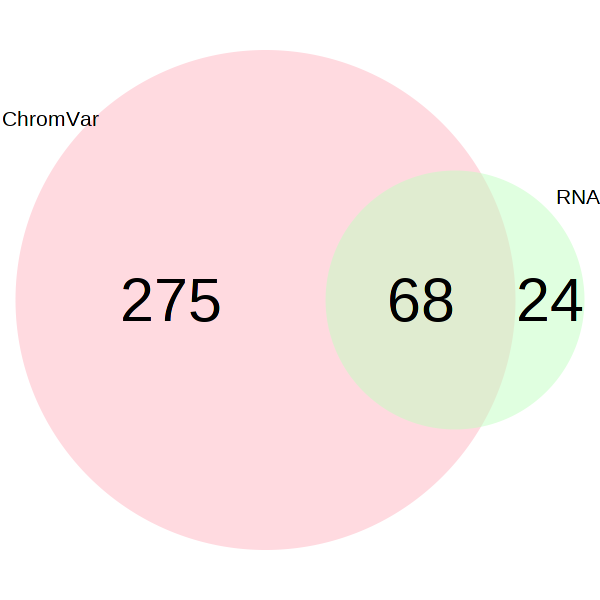

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
draw.pairwise.venn(
  area1 = sum(dat_merge_d3$pvalue_adj < 0.05 & dat_merge_d3$D3 > 0),
  area2 = sum(dat_merge_d3$padj < 0.05 & dat_merge_d3$log2FoldChange > 0),
  cross.area = sum(dat_merge_d3$pvalue_adj < 0.05 & dat_merge_d3$D3 > 0 & dat_merge_d3$padj < 0.05 & dat_merge_d3$log2FoldChange > 0),
  category = c("ChromVar", 'RNA'), 
  lty = "blank", 
  fill = c("lightpink", "darkseagreen1"),
  cex = 3,
  cat.cex = 1
)

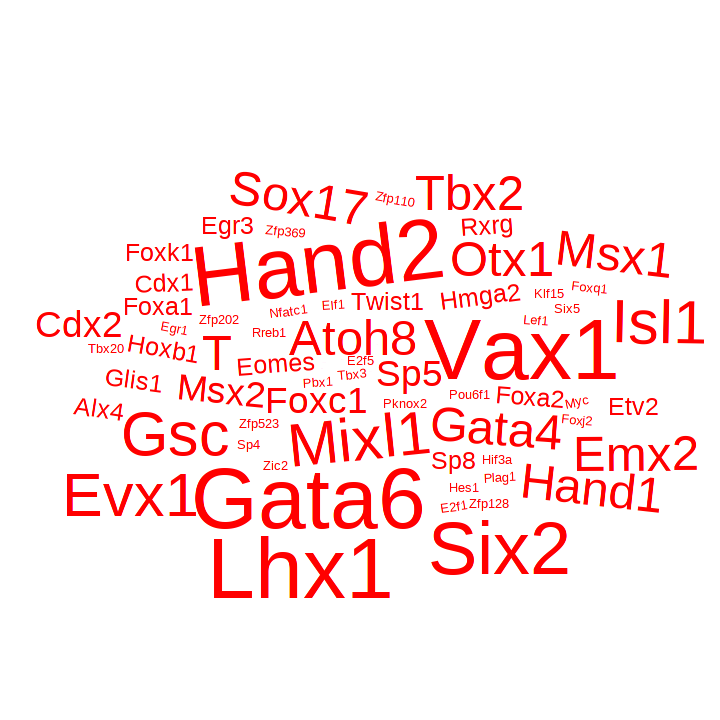

In [ ]:
tf <- dat_merge_d3 %>% filter(pvalue_adj < 0.05 & D3 > 0 & padj < 0.05 & log2FoldChange > 0)
set.seed(1234)
df <- data.frame(
  word = tf$gene_name,
  freq = round(tf$log2FoldChange)
)
options(repr.plot.width=6, repr.plot.height=6)
ggwordcloud2(df, color = 'red')


In [ ]:
tf <- tf %>% arrange(-log2FoldChange)

In [ ]:
up_gene_d3 <- unique(c('Isl1','Gata4', 'Hand2', 'T', 'Gata6', 'Tbx3', 'Tbx20','Tbx2',head(tf$gene_name,10)))

In [ ]:
write.table(tf,'Foxk1_D3_NoDox_up.tsv', sep = '\t')

### KO Day 3 upregulated Transcription factors

(polygon[GRID.polygon.462], polygon[GRID.polygon.463], polygon[GRID.polygon.464], polygon[GRID.polygon.465], text[GRID.text.466], text[GRID.text.467], text[GRID.text.468], text[GRID.text.469], text[GRID.text.470]) 

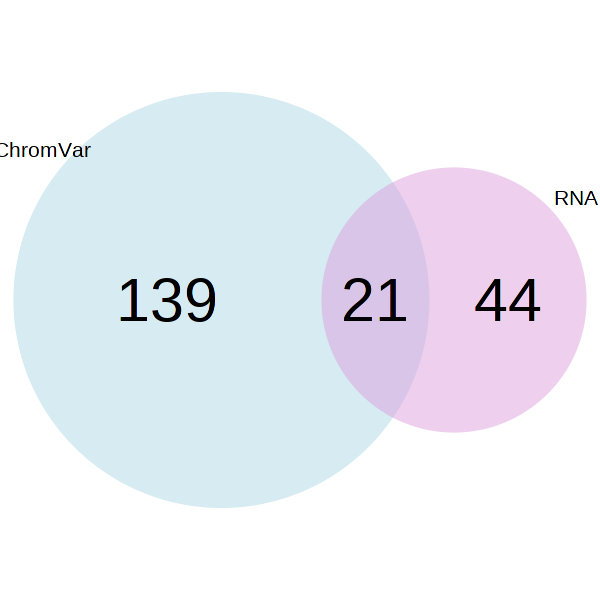

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
draw.pairwise.venn(
  area1 = sum(dat_merge_d3$pvalue_adj < 0.05 & dat_merge_d3$D3 < 0),
  area2 = sum(dat_merge_d3$padj < 0.05 & dat_merge_d3$log2FoldChange < 0),
  cross.area = sum(dat_merge_d3$pvalue_adj < 0.05 & dat_merge_d3$D3 < 0 & dat_merge_d3$padj < 0.05 & dat_merge_d3$log2FoldChange < 0),
  category = c("ChromVar", 'RNA'), 
  lty = "blank", 
  fill = c("lightblue", "plum"),
  cex = 3,
  cat.cex = 1
)

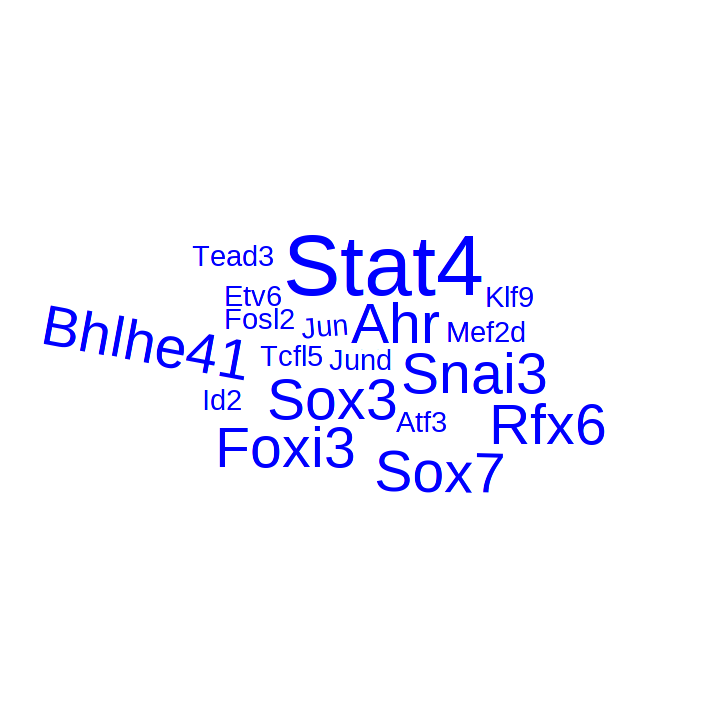

In [ ]:
tf <- dat_merge_d3 %>% filter(pvalue_adj < 0.05 & D3 < 0 & padj < 0.05 & log2FoldChange < 0)
set.seed(2345)
df <- data.frame(
  word = tf$gene_name,
  freq = round(-tf$log2FoldChange)
)
options(repr.plot.width=6, repr.plot.height=6)
ggwordcloud2(df, color = 'blue')

In [ ]:
tf <- tf %>% arrange(-log2FoldChange)

In [ ]:
down_gene_d3 <- unique(head(tf$gene_name,10))

In [ ]:
write.table(tf,'Foxk1_D3_KO_up.tsv', sep = '\t')

## Heatmap for integration D3 showing genes up and down in Control and Foxk1 Null

In [ ]:
sig_d3 <- dat_merge_d3 %>% filter(pvalue_adj < 0.05 & abs(D3) > 0 & padj < 0.05 & abs(log2FoldChange) > 0)

In [ ]:
d3_scale <- scale(t(mat[rownames(mat) %in% sig_d3$gene_name,c("1_D3_iHAFoxk1_EB_ND","2_D3_iHAFoxk1_EB_ND","1_D3_Foxk1KO_EB", "2_D3_Foxk1KO_EB")])) ## subsetting countdata to significant genes

In [ ]:
d3 <- na.omit(t(d3_scale)) ##Transforming the matrix back to a genes x sample matrix

In [ ]:
term <- c(up_gene_d3, down_gene_d3)

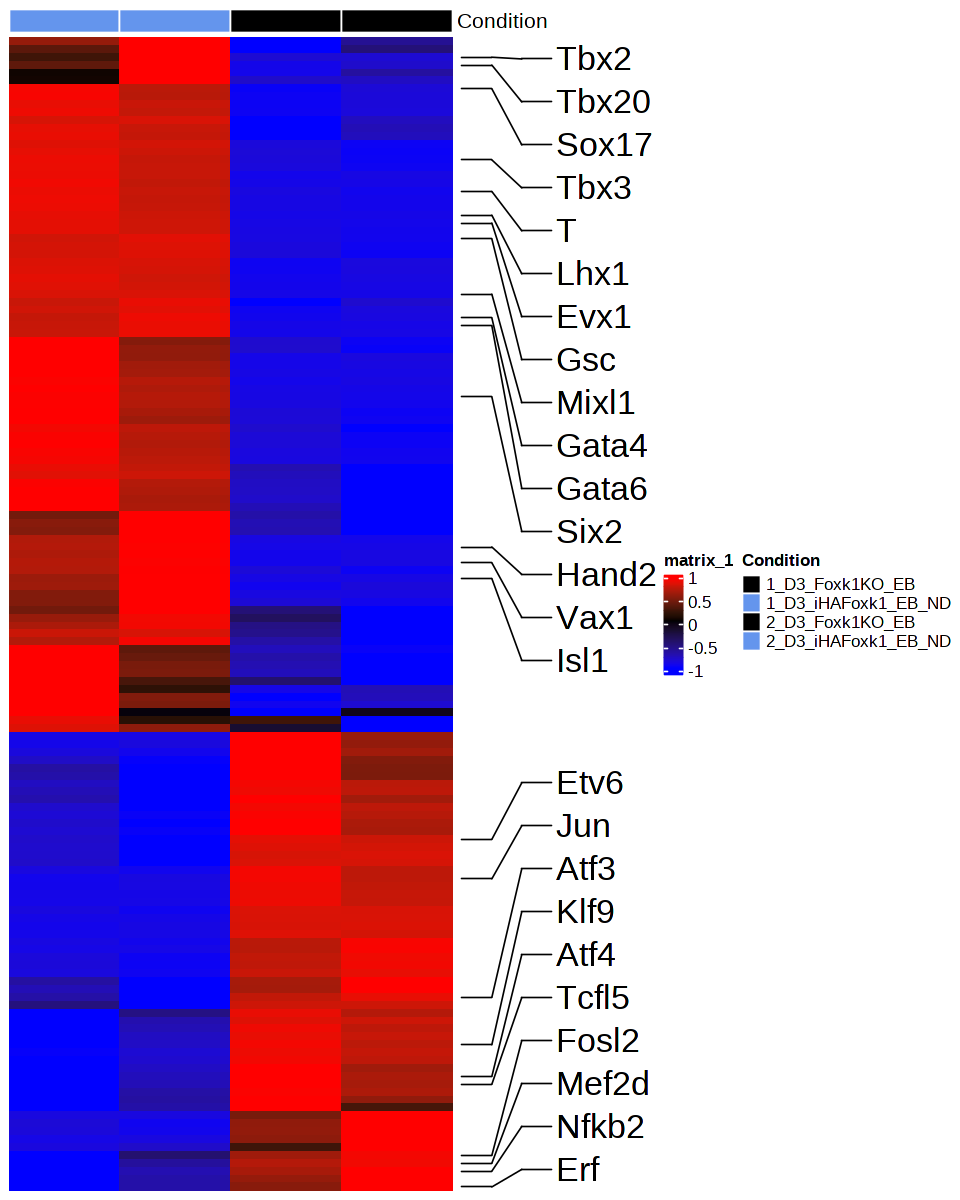

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colnames(d3),
  col = list(Condition = c(
  "1_D3_iHAFoxk1_EB_ND" = "cornflowerblue", "2_D3_iHAFoxk1_EB_ND" = "cornflowerblue", "1_D3_Foxk1KO_EB" = "black", "2_D3_Foxk1KO_EB" = "black")),
  gp = gpar(col = "white")
)

col_fun <- colorRamp2(quantile(d3, c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

options(repr.plot.width=8, repr.plot.height = 10)
Heatmap(
  d3,
  cluster_rows = TRUE,
  cluster_columns = TRUE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 15))   +
  rowAnnotation(
    mark = anno_mark(
      at = which(rownames(d3) %in% term), 
      labels = rownames(d3)[rownames(d3) %in% term], 
      labels_gp = gpar(fontsize = 20), 
      link_width = unit(20, "mm"),
      padding = unit(1, "mm"), 
      which = 'row'
    ) 
  )

### WT(ND) Day 5 upregulated Transcription factors

(polygon[GRID.polygon.925], polygon[GRID.polygon.926], polygon[GRID.polygon.927], polygon[GRID.polygon.928], text[GRID.text.929], text[GRID.text.930], text[GRID.text.931], text[GRID.text.932], text[GRID.text.933]) 

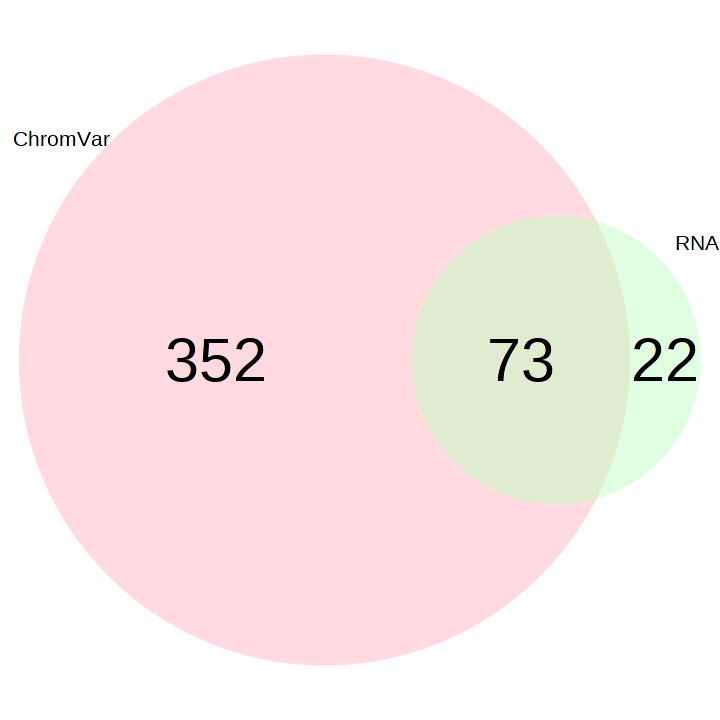

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
draw.pairwise.venn(
  area1 = sum(dat_merge_d5$pvalue_adj < 0.05 & dat_merge_d5$D5 > 0),
  area2 = sum(dat_merge_d5$padj < 0.05 & dat_merge_d5$log2FoldChange > 0),
  cross.area = sum(dat_merge_d5$pvalue_adj < 0.05 & dat_merge_d5$D5 > 0 & dat_merge_d5$padj < 0.05 & dat_merge_d5$log2FoldChange > 0),
  category = c("ChromVar", 'RNA'), 
  lty = "blank", 
  fill = c("lightpink", "darkseagreen1"),
  cex = 3,
  cat.cex = 1
)

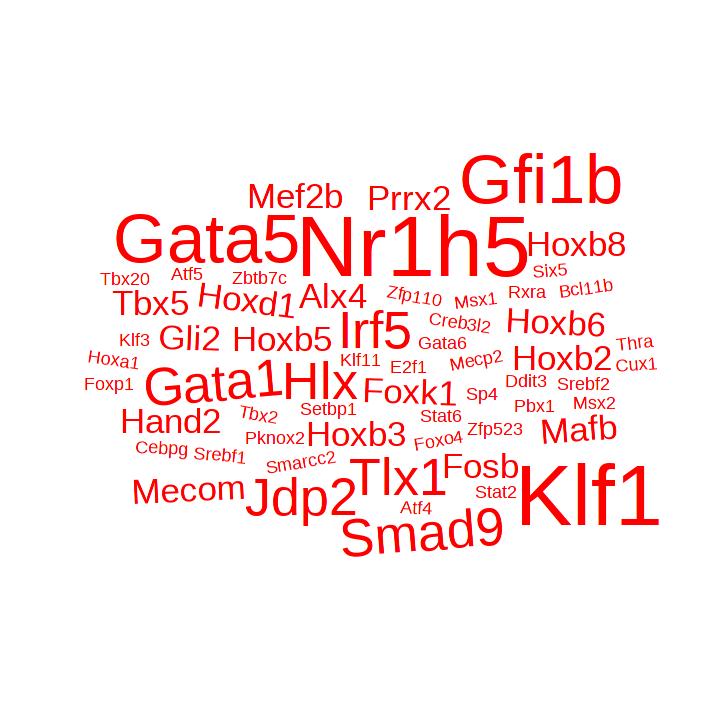

In [ ]:
tf <- dat_merge_d5 %>% filter(pvalue_adj < 0.05 & D5 > 0 & padj < 0.05 & log2FoldChange > 0)
set.seed(3456)
df <- data.frame(
  word = tf$gene_name,
  freq = round(tf$log2FoldChange)
)
options(repr.plot.width=6, repr.plot.height=6)
ggwordcloud2(df, color = 'red')

In [ ]:
tf <- tf %>% arrange(-log2FoldChange)

In [ ]:
write.table(tf,'Foxk1_D5_ND_up.tsv', sep = '\t')

In [ ]:
up_gene_d5 <- unique(c('Tbx5','Hand2','Foxk1', 'Tbx2', 'Tbx20', 'Gata6', 'Klf3', 'Smarca2',head(tf$gene_name,8)))

### KO Day 5 upregulated Transcription factors

(polygon[GRID.polygon.1411], polygon[GRID.polygon.1412], polygon[GRID.polygon.1413], polygon[GRID.polygon.1414], text[GRID.text.1415], text[GRID.text.1416], text[GRID.text.1417], text[GRID.text.1418], text[GRID.text.1419]) 

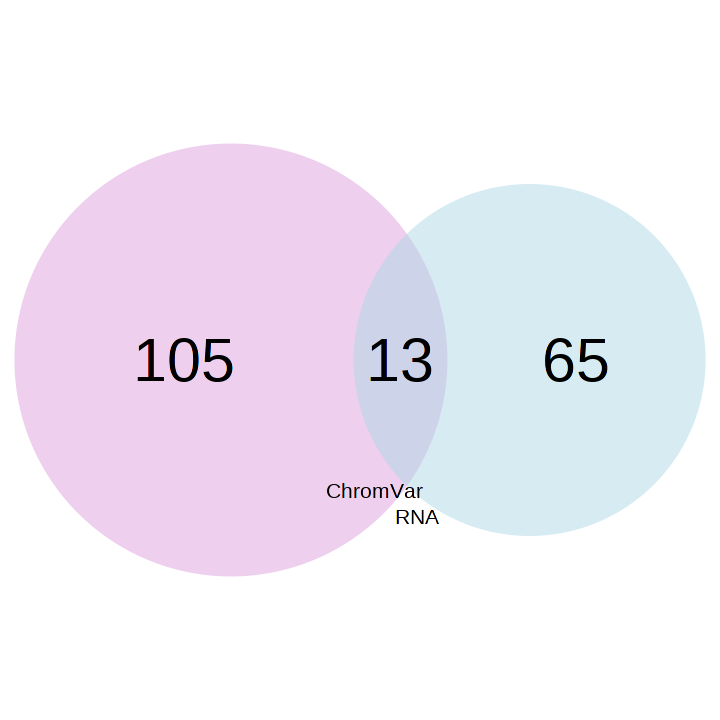

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
draw.pairwise.venn(
  area1 = sum(dat_merge_d5$pvalue_adj < 0.05 & dat_merge_d5$D5 < 0),
  area2 = sum(dat_merge_d5$padj < 0.05 & dat_merge_d5$log2FoldChange < 0),
  cross.area = sum(dat_merge_d5$pvalue_adj < 0.05 & dat_merge_d5$D5 < 0 & dat_merge_d5$padj < 0.05 & dat_merge_d5$log2FoldChange < 0),
  category = c("ChromVar", 'RNA'), 
  lty = "blank", 
  fill = c("lightblue", "plum"),
  cex = 3,
  cat.cex = 1
)

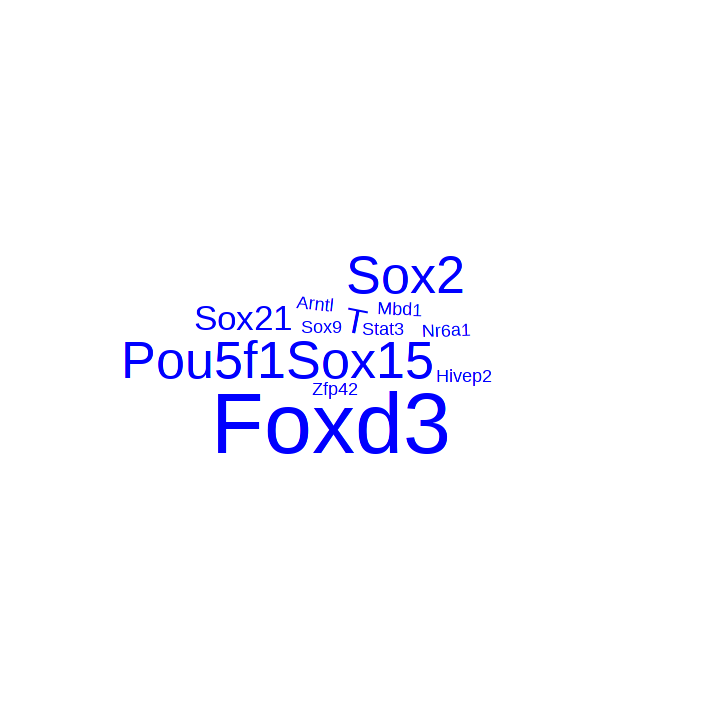

In [ ]:
tf <- dat_merge_d5 %>% filter(pvalue_adj < 0.05 & D5 < 0 & padj < 0.05 & log2FoldChange < 0)
set.seed(4567)
df <- data.frame(
  word = tf$gene_name,
  freq = round(-tf$log2FoldChange)
)
options(repr.plot.width=6, repr.plot.height=6)
ggwordcloud2(df, color = 'blue')


In [ ]:
tf <- tf %>% arrange(-log2FoldChange)

In [ ]:
write.table(tf,'Foxk1_D5_KO_up.tsv', sep = '\t')

In [ ]:
down_gene_d5 <- unique(head(tf$gene_name,11))

## Heatmap for integration D5 showing genes up and down in Control and Foxk1 Null

In [ ]:
sig_d5 <- dat_merge_d5 %>% filter(pvalue_adj < 0.05 & abs(D5) > 0 & padj < 0.05 & abs(log2FoldChange) > 0)

In [ ]:
head(mat)

,1_D3_Foxk1KO_EB,1_D3_iHAFoxk1_EB_Dox,1_D3_iHAFoxk1_EB_ND,1_D5_Foxk1KO_EB,1_D5_iHAFoxk1_EB_Dox,1_D5_iHAFoxk1_EB_ND,2_D3_Foxk1KO_EB,2_D3_iHAFoxk1_EB_Dox,2_D3_iHAFoxk1_EB_ND,2_D5_Foxk1KO_EB,2_D5_iHAFoxk1_EB_Dox,2_D5_iHAFoxk1_EB_ND
Gnai3,2600,2626,2483,3348,3110,3011,2760,2643,2528,3164,2958,2931
Pbsn,0,0,0,0,0,0,0,0,0,0,0,0
Cdc45,459,574,606,531,581,435,523,624,569,508,489,476
Scml2,60,155,173,35,97,65,34,159,129,46,83,57
Apoh,0,0,0,0,0,0,0,0,0,0,0,0
Narf,298,246,390,452,339,235,303,229,386,523,339,270


In [ ]:
d5_scale <- scale(t(mat[rownames(mat) %in% sig_d5$gene_name,c('1_D5_iHAFoxk1_EB_ND','2_D5_iHAFoxk1_EB_ND','1_D5_Foxk1KO_EB','2_D5_Foxk1KO_EB')])) ## subsetting countdata to significant genes

In [ ]:
d5 <- na.omit(t(d5_scale)) ##Transforming the matrix back to a genes x sample matrix

In [ ]:
term <- c(up_gene_d5, down_gene_d5)
term <- term[!term %in% 'T']

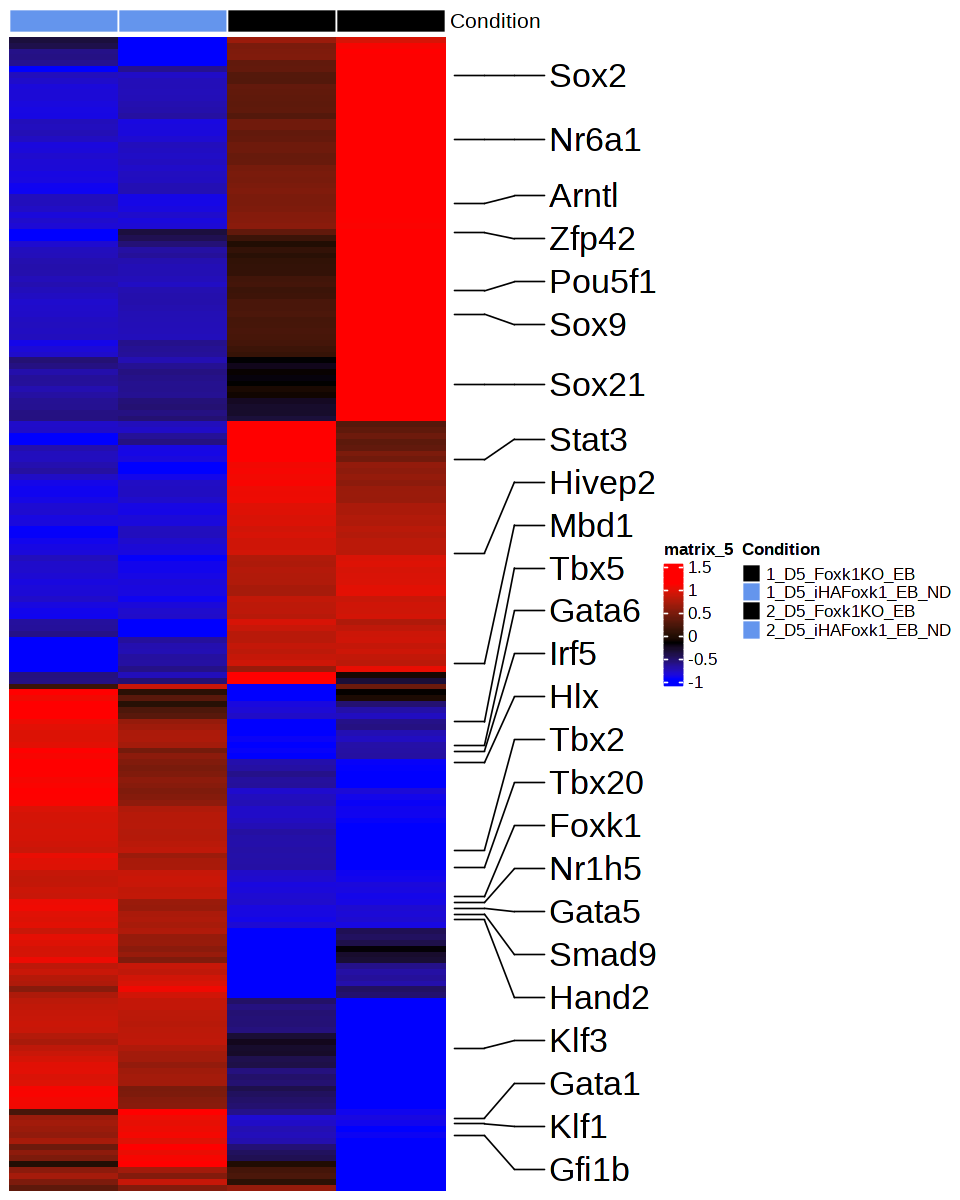

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colnames(d5),
  col = list(Condition = c(
  "1_D5_iHAFoxk1_EB_ND" = "cornflowerblue", "2_D5_iHAFoxk1_EB_ND" = "cornflowerblue", "1_D5_Foxk1KO_EB" = "black", "2_D5_Foxk1KO_EB" = "black")),
  gp = gpar(col = "white")
)

col_fun <- colorRamp2(quantile(d5, c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

options(repr.plot.width=8, repr.plot.height = 10)
Heatmap(
  d5,
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 15))   +
  rowAnnotation(
    mark = anno_mark(
      at = which(rownames(d5) %in% term), 
      labels = rownames(d5)[rownames(d5) %in% term], 
      labels_gp = gpar(fontsize = 20), 
      link_width = unit(20, "mm"),
      padding = unit(1, "mm"), 
      which = 'row'
    ) 
  )

#**Conclusion**

The analysis shows that Gata TFs and Hand 1 and 2, Isl1  related to cardiac development is highlighted in the WT(ND) upregulated Transcripts.

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [2] GenomicFeatures_1.46.5                   
 [3] gageData_2.32.0                          
 [4] gage_2.44.0                              
 [5] pathview_1.34.0                          
 [6] enrich